In [72]:
import pandas as pd

In [116]:
Educ = pd.read_csv("School enrollement.csv")
Inflation = pd.read_csv("inflation.csv")
gdp = pd.read_csv("gdp afr.csv")
gini = pd.read_csv("gini afr.csv")
trade = pd.read_csv("Trade afr.csv")
unemployment_rate = pd.read_csv("unemployment rate.csv")
covid = pd.read_csv('covid-data.csv')


In [112]:
# Convert the wide format data into a long format
Unemp_rate = pd.melt(unemployment_rate, id_vars=["Country Name"],
                    var_name="Year", value_name="Unemployment Rate")
# Convert year from string to numeric
Unemp_rate['Year'] = pd.to_numeric(Unemp_rate['Year'], errors='coerce')

# Convert the wide format data into a long format
gini_ = pd.melt(gini, id_vars=["Country Name"],
                    var_name="Year", value_name="gini Index")
# Convert year from string to numeric
gini_['Year'] = pd.to_numeric(gini_['Year'], errors='coerce')

# Convert the wide format data into a long format
gdp_ = pd.melt(gdp, id_vars=["Country Name"],
                    var_name="Year", value_name="GDP (current US$)")
# Convert year from string to numeric
gdp_['Year'] = pd.to_numeric(gdp_['Year'], errors='coerce')

# Convert the wide format data into a long format
Inflation_ = pd.melt(Inflation, id_vars=["Country Name"],
                    var_name="Year", value_name="Inflation, consumer prices (annual %)")
# Convert year from string to numeric
Inflation_['Year'] = pd.to_numeric(Inflation_['Year'], errors='coerce')

# Convert the wide format data into a long format
Educ_ = pd.melt(Educ, id_vars=["Country Name"],
                    var_name="Year", value_name="School enrollment, secondary ('%' gross)")
# Convert year from string to numeric
Educ_['Year'] = pd.to_numeric(Educ_['Year'], errors='coerce')

# Convert the wide format data into a long format
trade_ = pd.melt(trade, id_vars=["Country Name"],
                    var_name="Year", value_name="Trade (%' of GDP)")
# Convert year from string to numeric
trade_['Year'] = pd.to_numeric(trade_['Year'], errors='coerce')


In [103]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Republic of the Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", 
    "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", 
    "Georgia", "India", "Indonesia", "Iran", "Iraq", "Japan", "Jordan", "Kazakhstan", "Kuwait", 
    "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", 
    "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", 
    "Pakistan", "Palestine", "Philippines", "Qatar", "Russia", 
    "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", 
    "Taiwan", "Tajikistan", "Thailand", "Timor-Leste (East Timor)", "Turkey", 
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]


In [76]:
# gdp.rename(columns={'Entity': 'Country'}, inplace=True)
# # gdp_per_capita.rename(columns={'Entity': 'Country'}, inplace=True)
# trade.rename(columns={'Entity': 'Country'}, inplace=True)
# gini.rename(columns={'Entity': 'Country'}, inplace=True)
# Educ.rename(columns={'Entity': 'Country'}, inplace=True)

In [114]:

Unemp_rate = Unemp_rate[Unemp_rate['Year'] >= 2016]
Inflation_ = Inflation_[Inflation_['Year'] >= 2016]
gdp_ = gdp_[gdp_['Year'] >= 2016]
Educ_ = Educ_[Educ_['Year'] >= 2016]
gini_ = gini_[gini_['Year'] >= 2016]
trade_ = trade_[trade_['Year'] >= 2016]

,Country Name,Year,Trade (%' of GDP)
15694,Aruba,2016.0,142.239763
15695,Africa Eastern and Southern,2016.0,51.77753
15696,Afghanistan,2016.0,NaN
15697,Africa Western and Central,2016.0,NaN
15698,Angola,2016.0,53.370158
...,...,...,...
17551,Kosovo,2022.0,109.514057
17552,"Yemen, Rep.",2022.0,NaN
17553,South Africa,2022.0,65.060735
17554,Zambia,2022.0,69.297315


In [135]:
df_merged = Inflation_.merge(gini_, on=['Country Name', 'Year'], how= 'outer')
df_merged = df_merged.merge(gdp_, on=['Country Name', 'Year'],how= 'outer')
df_merged = df_merged.merge(Educ_, on=['Country Name', 'Year'], how= 'left')
df_merged = df_merged.merge(Unemp_rate, on=['Country Name', 'Year'], how= 'left')
df_merged = df_merged.merge(trade_, on=['Country Name', 'Year'], how= 'left')
df_merged['Year']= df_merged['Year'].astype(int)
df_merged.rename(columns={'Country Name': 'Location', 'GDP (current US$)': 'GDP', "School enrollment, secondary ('%' gross)":'School enrollment', 'Inflation, consumer prices (annual %)': 'Inflation'}, inplace=True)
dfmer = df_merged.sort_values(by='Location')


In [136]:
df_africains = dfmer[dfmer['Location'].isin(african_countries)]
df_asia = dfmer[dfmer['Location'].isin(asian_countries)]

df_asia

,Location,Year,Inflation,gini Index,GDP,School enrollment,Unemployment Rate,Trade (%' of GDP)
2,Afghanistan,2016,4.383892,NaN,18116572399.0,53.50634,10.092,NaN
1332,Afghanistan,2021,NaN,NaN,14266499430.0,NaN,12.075,51.411716
1066,Afghanistan,2020,NaN,NaN,19955929061.0,NaN,11.71,46.709895
268,Afghanistan,2017,4.975952,NaN,18753456507.0,55.402149,11.18,NaN
1598,Afghanistan,2022,NaN,NaN,NaN,NaN,14.1,NaN
...,...,...,...,...,...,...,...,...
1848,Uzbekistan,2022,11.446644,NaN,80391853887.0,88.796463,4.507,71.578945
518,Uzbekistan,2017,13.875743,NaN,62081322740.0,93.589096,5.83,47.784659
1050,Uzbekistan,2019,14.525736,NaN,60283503705.0,96.683311,4.92,72.518327
252,Uzbekistan,2016,8.130887,NaN,86138288633.0,92.808411,5.16,29.192297


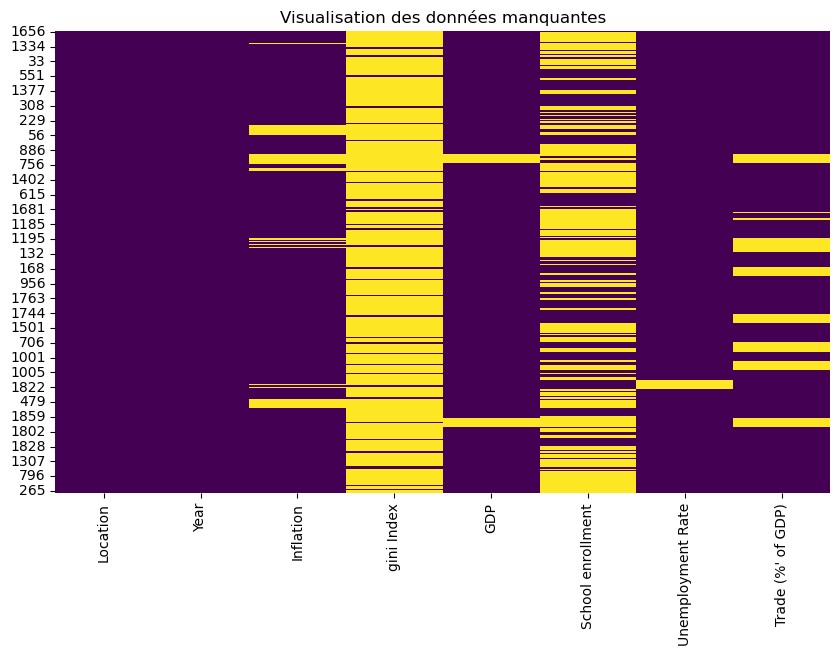

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_africains.isnull(), cbar=False, cmap='viridis')

plt.title('Visualisation des données manquantes')
plt.show()

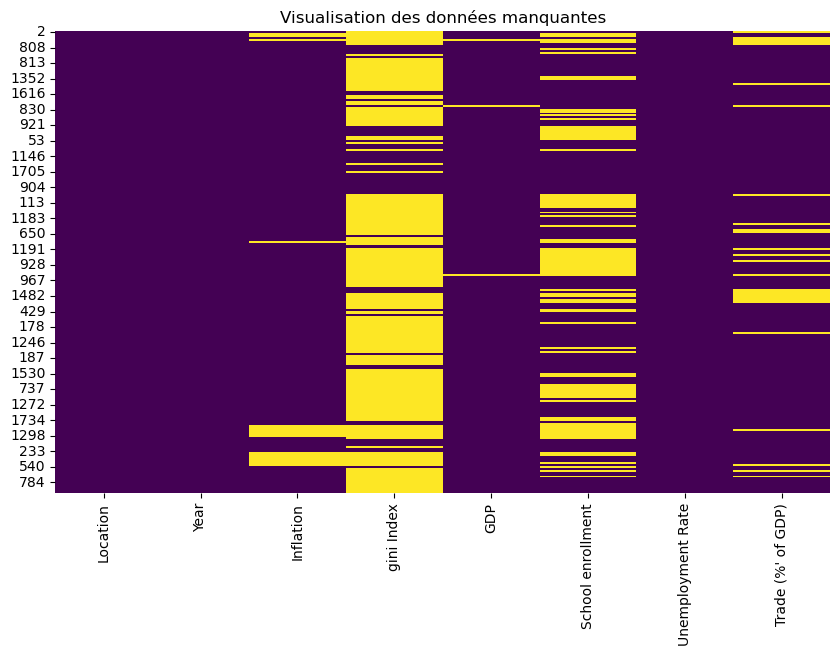

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_asia.isnull(), cbar=False, cmap='viridis')

plt.title('Visualisation des données manquantes')
plt.show()

In [126]:
pays_as_nan = df_asia[df_asia['School enrollment'].isna()]
pays_af_nan = df_africains[df_africains['School enrollment'].isna()]
df_africains.info

print(len(pays_af_nan['Location']),len(pays_as_nan['Location']))

191 82


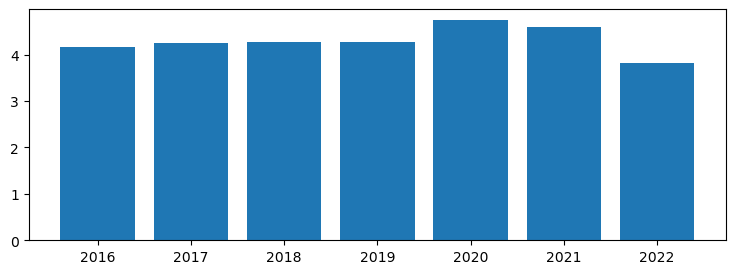

In [83]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
plt.bar(df_merged[df_merged['Country Name'] == 'Africa Western and Central']['Year'], df_merged[df_merged['Country Name'] == 'Africa Western and Central']['Unemployment Rate'])
# plt.show()